# Introduction 

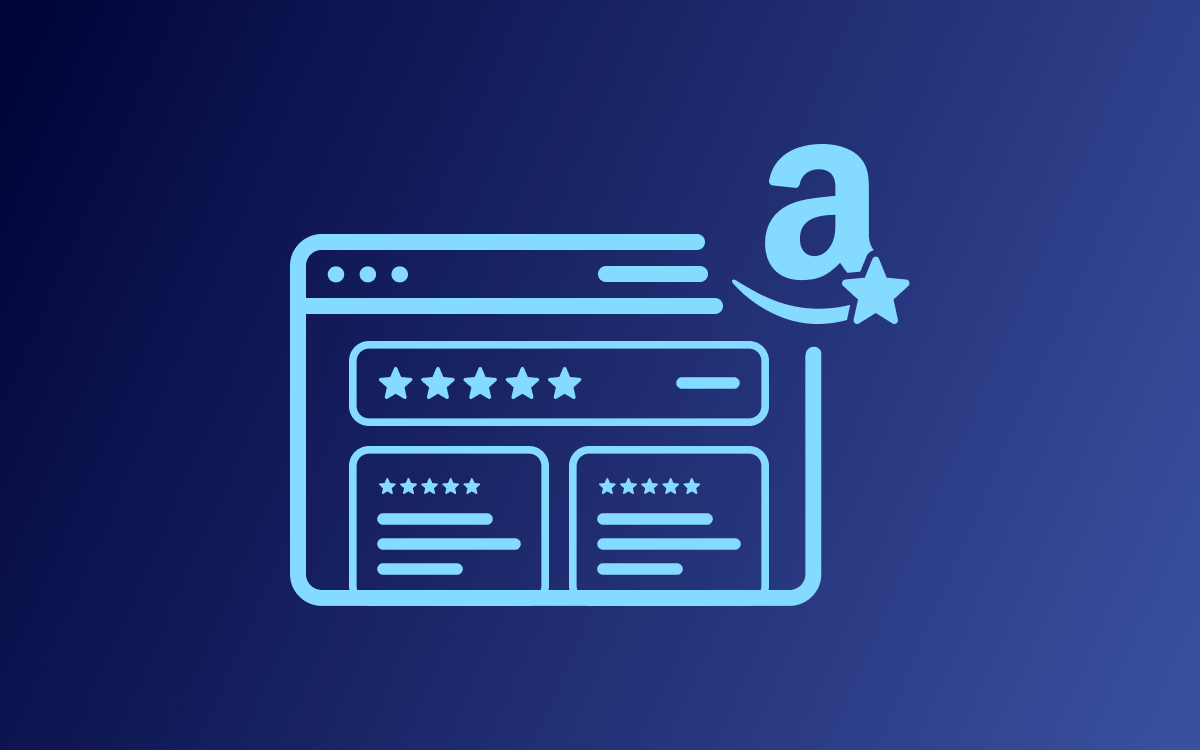

In [7]:
from IPython.display import Image, display
display(Image(filename="C:/Users/giftm/Downloads/amazon1.png")) 

In today's digital landscape, e-commerce platforms like Amazon and Flipkart rely heavily on sophisticated recommendation systems to deliver a seamless user experience. By analyzing large datasets containing user interactions, these systems can predict which products a user is likely to be interested in, making the shopping experience more engaging and personalized. For example, Amazon's recommendation system plays a crucial role in driving consumer behavior by suggesting products based on various factors such as purchase history, browsing patterns, and product popularity.

In this project, we aim to build a recommendation model using Amazonâ€™s electronics product reviews dataset. The dataset includes unique user and product identifiers, ratings, and timestamps, providing a rich foundation for understanding consumer preferences. Our goal is to leverage this data to develop a system that mimics real-world applications of recommendation technology, offering personalized suggestions to enhance the user experience on e-commerce platforms. This project will demonstrate how data-driven insights can be used to predict user preferences and deliver targeted recommendations that align with consumer behavior trends.

Data Source: [Amazon Reviews Data](http://jmcauley.ucsd.edu/data/amazon/).

In [526]:
# Required Libraries for Data Loading and Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Mathematical calculation
import numpy as np
from scipy.sparse.linalg import svds
from sklearn import model_selection
from sklearn.metrics.pairwise import cosine_similarity

# Data handling
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-surprise recommender package
from surprise import SVD, KNNWithMeans
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split, GridSearchCV
from surprise.prediction_algorithms.baseline_only import BaselineOnly

In [527]:
!pip install scikit-surprise


# Loading the data 

In [528]:
df = pd.read_csv('ratings_Electronics.csv', header=None, names=['user_id', 'product_id', 'rating', 'timestamp'])

In [529]:
df.head()

user_id  product_id  rating   timestamp
0   AKM1MP6P0OYPR  0132793040     5.0  1365811200
1  A2CX7LUOHB2NDG  0321732944     5.0  1341100800
2  A2NWSAGRHCP8N5  0439886341     1.0  1367193600
3  A2WNBOD3WNDNKT  0439886341     3.0  1374451200
4  A1GI0U4ZRJA8WN  0439886341     1.0  1334707200

# Data cleaning and exploration 

In [530]:
print("Number of rows    :",df.shape[0])
print("Number of columns :",df.shape[1])

Number of rows    : 7824482
Number of columns : 4


In this code, the df.shape function is used to display the size of the dataset. The number of rows is 7824482, indicating there are over 7.8 million records in the dataset. These rows represent individual product reviews. The number of columns is 4, which correspond to the features: userId (unique identifier for each user), productId (unique identifier for each product), rating (product rating by the user), and timestamp (the time the rating was given). 

In [531]:
# missing values
print(df.isnull().sum())
df.dropna(subset=['user_id', 'product_id', 'rating'], inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
print(df.info())

user_id       0
product_id    0
rating        0
timestamp     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     object        
 1   product_id  object        
 2   rating      float64       
 3   timestamp   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 238.8+ MB
None


In this code, we first check for missing values in the dataset using `df.isnull().sum()`, which reveals that there are no missing entries in the `user_id`, `product_id`, or `rating` columns, confirming data integrity. To ensure completeness, we drop any rows with missing values in these critical columns using `df.dropna()`. After this, we convert the `timestamp` column to a datetime format, facilitating time-based analyses. Finally, `df.info()` displays the dataset's structure, confirming it contains 7,824,482 entries across 4 columns, with data types including `object`, `float64`, and `datetime64`.

In [532]:
print("Minimum recorded ts:",df.timestamp.min())
print("Maximum recorded ts:",df.timestamp.max())

Minimum recorded ts: 1998-12-04 00:00:00
Maximum recorded ts: 2014-07-23 00:00:00


In this code, we determine the range of recorded timestamps in the dataset using `df.timestamp.min()` and `df.timestamp.max()`. The minimum recorded timestamp is **December 4, 1998**, indicating the earliest review, while the maximum recorded timestamp is **July 23, 2014**, marking the latest review. This range of timestamps provides valuable context regarding the time span of the data collected for the recommendation model.

In [533]:
print("The Minimum rating is:",df.rating.min())
print("The Maximum rating is:",df.rating.max())

The Minimum rating is: 1.0
The Maximum rating is: 5.0


In this code, we assess the range of product ratings within the dataset by using `df.rating.min()` and `df.rating.max()`. The minimum rating recorded is **1.0**, indicating the lowest possible score, while the maximum rating is **5.0**, representing the highest possible score. This range of ratings highlights the scale of feedback provided by users and is crucial for understanding the overall sentiment towards the products in the dataset.

# Exploratory Data Analysis

C:\Users\giftm\AppData\Local\Temp\ipykernel_3396\3426563880.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='rating', data=df, palette='coolwarm', edgecolor='black')


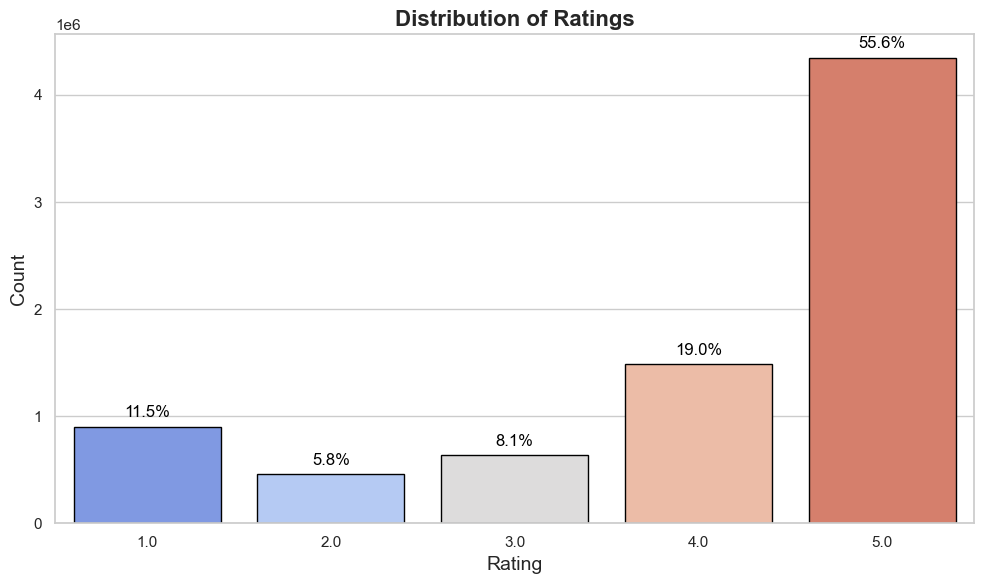

In [534]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x='rating', data=df, palette='coolwarm', edgecolor='black')
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, color='black')

plt.title('Distribution of Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

In the graph above, we are analyzing the distribution of ratings from 1.0 to 5.0 across a dataset. The majority of users, **55.6%**, gave a 5.0 rating, indicating high satisfaction, while **19.0%** rated the experience 4.0, showing moderately positive feedback. However, **11.5%** of users rated the experience as 1.0, reflecting a notable level of dissatisfaction. The neutral rating of 3.0 accounts for **8.1%**, and **5.8%** of users gave a 2.0 rating. This distribution highlights an overall positive trend, but the relatively high percentage of low ratings points to areas for improvement.

C:\Users\giftm\AppData\Local\Temp\ipykernel_3396\271469822.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='mako', edgecolor='black')


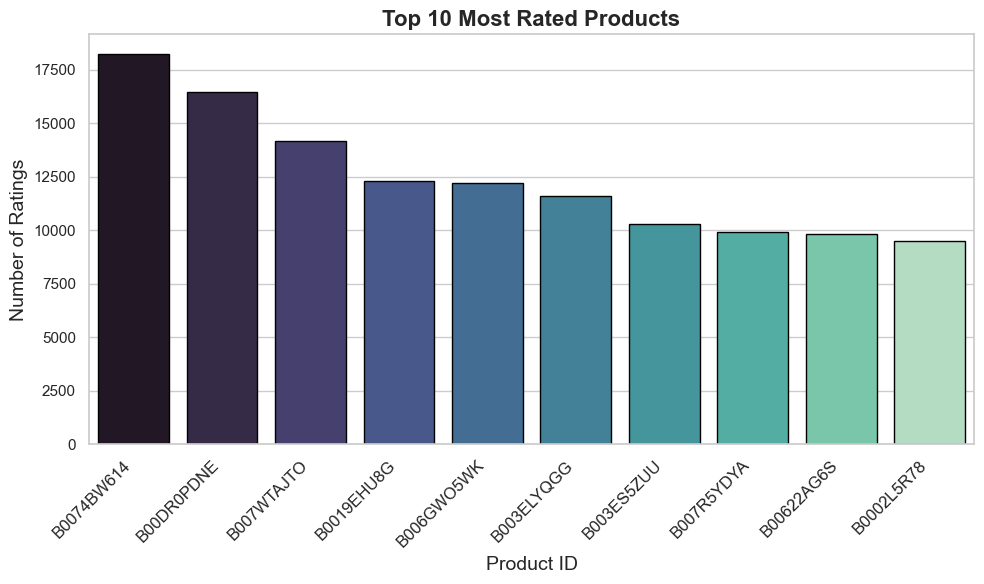

In [535]:
top_products = df['product_id'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=top_products.index, y=top_products.values, palette='mako', edgecolor='black')
plt.title('Top 10 Most Rated Products', fontsize=16, fontweight='bold')
plt.xlabel('Product ID', fontsize=14)
plt.ylabel('Number of Ratings', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

In the graph above, we are looking at the **Top 10 Most Rated Products** on Amazon based on the number of ratings each product received. The product with the highest number of ratings is **B0074BW614 (Kindle Paperwhite)**, with over **17,500** ratings. Following closely are **B00DR0PDNE (Amazon Fire TV Stick)** and **B00TVTAJTO (Amazon Fire TV Stick with Voice Remote)**, both exceeding **15,000** and **12,500** ratings respectively. Other products like **B0019EHU8G (SanDisk Ultra 32GB microSDHC Card)** and **B006GWO5WK (Kindle Fire)** received slightly fewer ratings but still rank within the top 10, all with all around **12,500** ratings. The rest of the products, including **B003ELYQGG (Apple iPhone 4 Bumper)** and **B00SESZUU (Fire HD 6 Tablet)**, have ratings just below **12,500**. This visualization highlights the popularity of specific products on Amazon, with each receiving substantial customer feedback, indicating their widespread use and high engagement among customers.

C:\Users\giftm\AppData\Local\Temp\ipykernel_3396\591785848.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('timestamp').resample('M').size().plot(color='steelblue', marker='o', linestyle='-', linewidth=2)


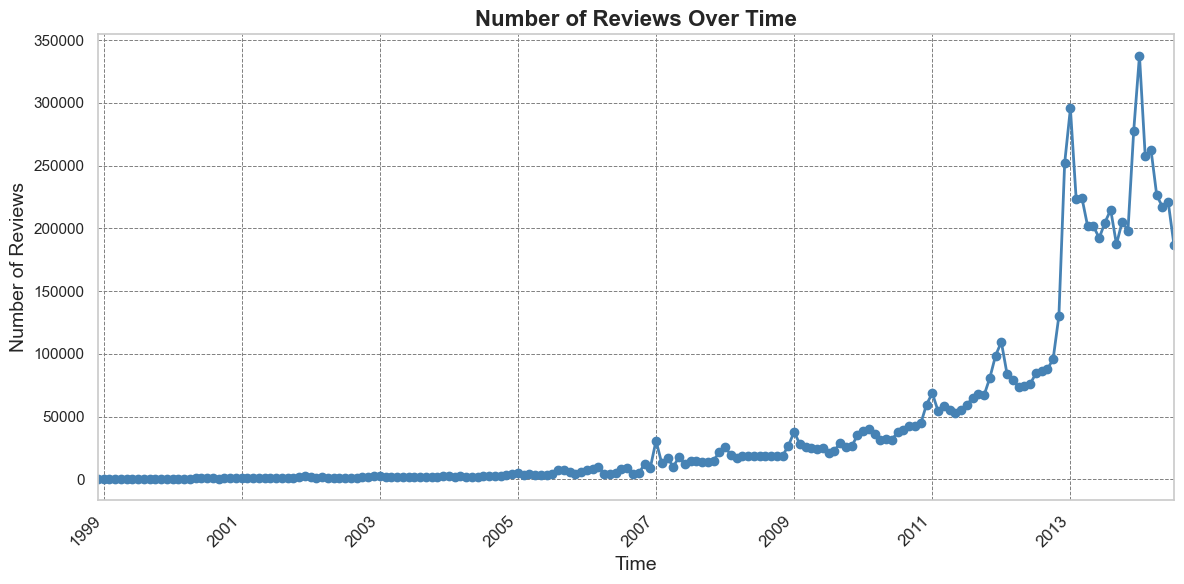

In [536]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  
df.set_index('timestamp').resample('M').size().plot(color='steelblue', marker='o', linestyle='-', linewidth=2)
plt.title('Number of Reviews Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In the graph above, we are observing the number of reviews over time, starting from the year 1998 up until around 2014. Initially, the number of reviews remains low and relatively stable, with minor fluctuations, until around 2008. After that, we see a clear upward trend, particularly noticeable from 2010 onward, where the number of reviews begins to increase sharply. This growth accelerates until reaching a peak between 2012 and 2014, where the number of reviews exceeds 300,000 at its highest. Following this peak, there is a noticeable volatility, with fluctuations in the number of reviews, although it remains significantly higher than in the earlier period. This suggests that a substantial shift or event occurred around 2010, leading to increased user engagement or platform growth.

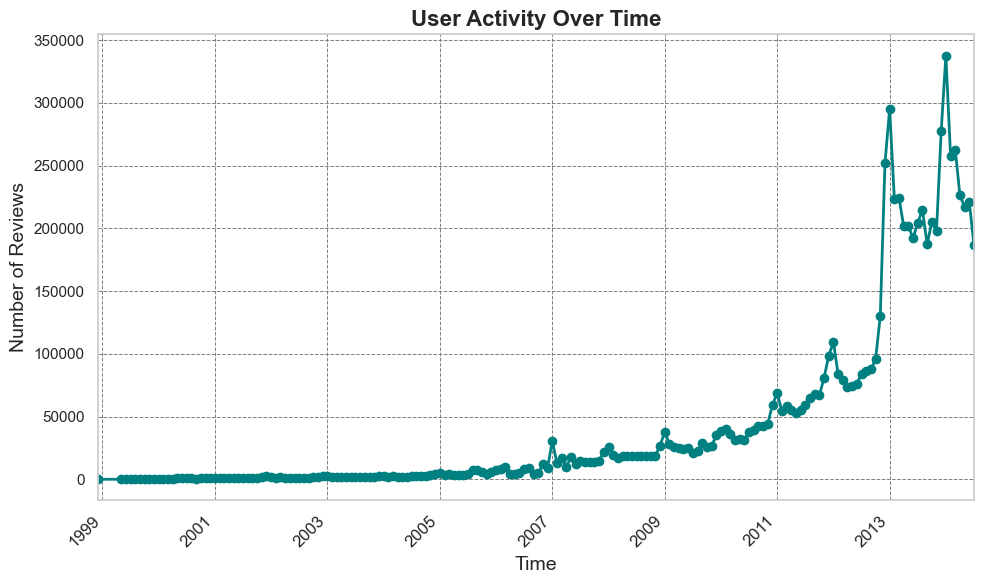

In [539]:
plt.figure(figsize=(10, 6))
user_activity = df.groupby(['user_id', df['timestamp'].dt.to_period('M')]).size().reset_index(name='count')
total_activity = user_activity.groupby('timestamp')['count'].sum()
total_activity.plot(color='teal', marker='o', linestyle='-', linewidth=2)
plt.title('User Activity Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In the graph above, we are observing the trend of user activity over time, specifically the number of reviews on an e-commerce platform. The data reveals a gradual increase in reviews from 1999 to around 2007, followed by a more noticeable and steady growth between 2008 and 2011. A sharp surge in user activity is evident from 2011 to 2014, where the number of reviews peaks at around 350,000, indicating a significant rise in user engagement during this period. After 2013, there is a visible fluctuation in review counts, suggesting some volatility or changing patterns in user activity. This trend could reflect the growing popularity of e-commerce platforms, changes in consumer behavior, or platform-specific factors influencing review contributions. Overall, the graph showcases how user engagement in product reviews increased significantly over time, highlighting the importance of understanding such patterns for optimizing recommendation systems.

C:\Users\giftm\AppData\Local\Temp\ipykernel_3396\3770020988.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('timestamp').resample('M')['rating'].mean().plot(color='orange', marker='o', linestyle='-', linewidth=2)


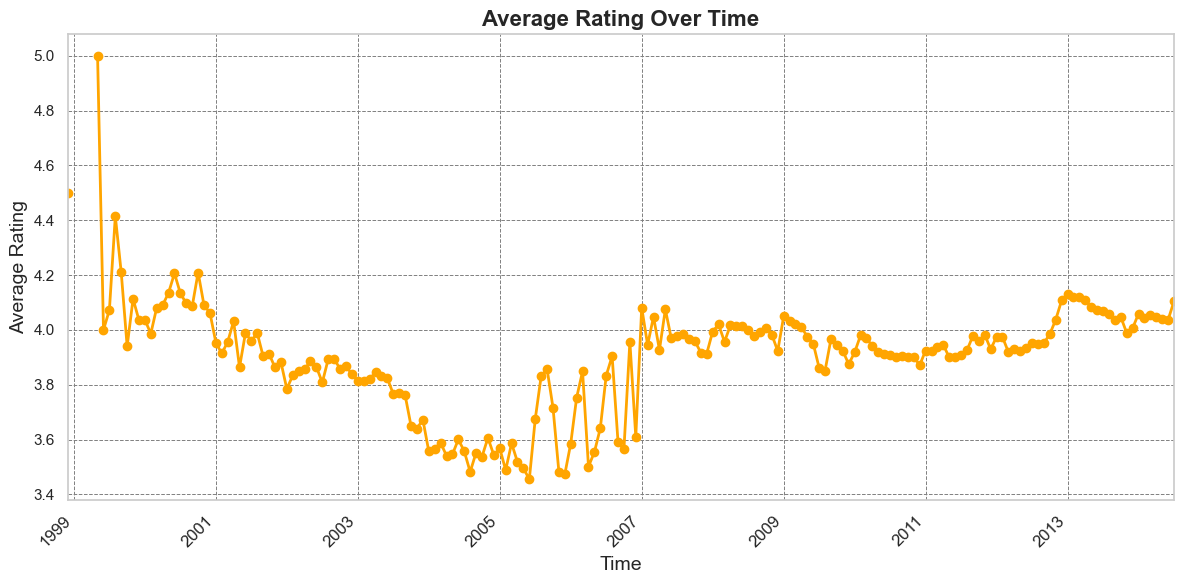

In [537]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid") 
df.set_index('timestamp').resample('M')['rating'].mean().plot(color='orange', marker='o', linestyle='-', linewidth=2)
plt.title('Average Rating Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In the graph above, we are analyzing the **Average Rating Over Time** for products on Amazon. The chart shows how the average rating fluctuated from around **1999 to 2014**. Initially, there is a sharp rise in the average rating, peaking at **5.0** in **1999**, but this is followed by a steady decline in ratings over the next few years, dropping to around **3.5** by **2005**. After 2005, we observe more volatility, with the ratings oscillating between **3.6** and **4.0**, stabilizing somewhat after **2007** and showing a gradual increase in the average rating beyond **2010**. This suggests that customer satisfaction and perceptions of product quality may have varied significantly over this period, potentially influenced by changes in product offerings, customer expectations, or review behaviors. The steady recovery post-2007 indicates improvements in the average user experience, possibly linked to shifts in marketplace dynamics or product quality adjustments.

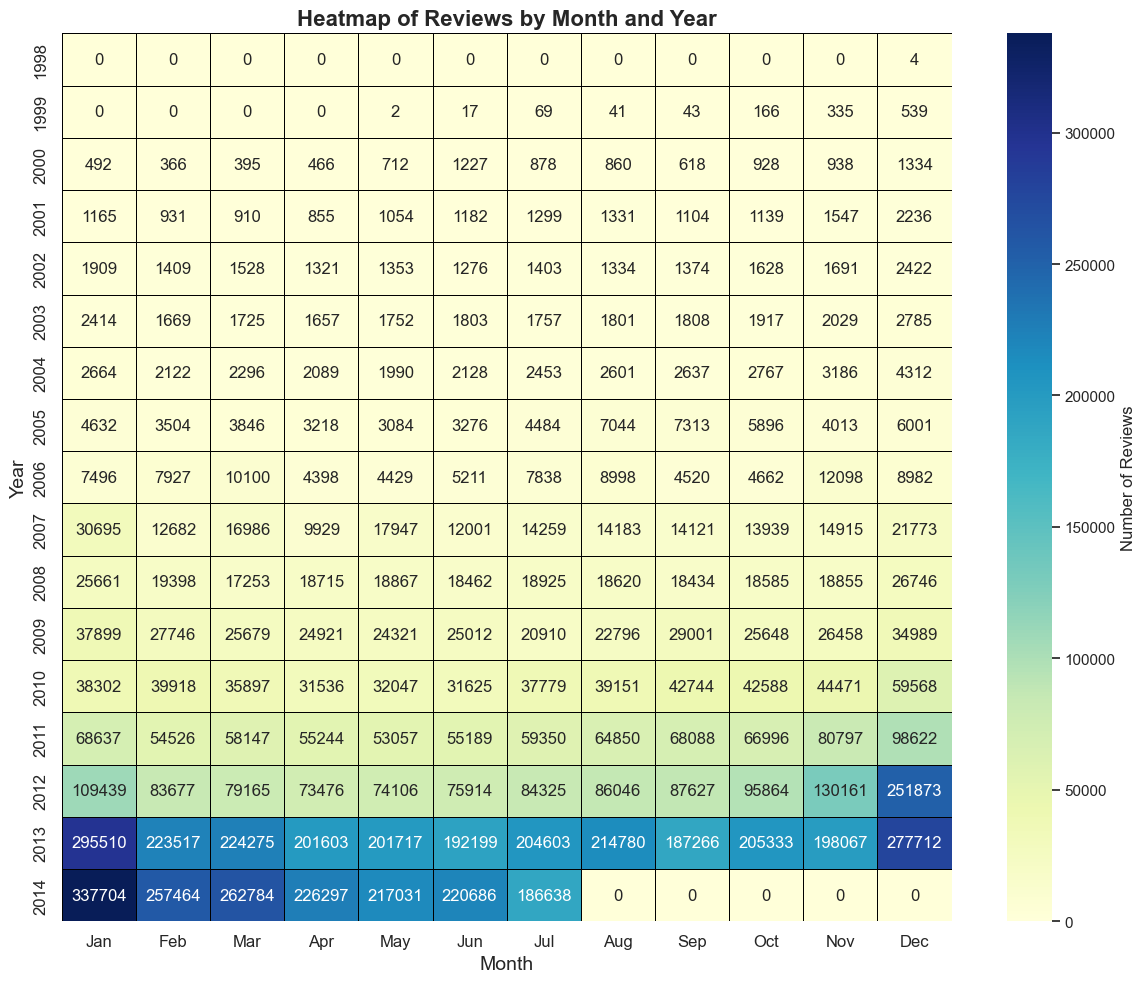

In [538]:
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year
review_counts = df.groupby(['year', 'month']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")  

heatmap = sns.heatmap(review_counts, annot=True, fmt='d', cmap='YlGnBu', 
                      linewidths=0.5, linecolor='black', cbar_kws={'label': 'Number of Reviews'})
plt.title('Heatmap of Reviews by Month and Year', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.xticks(ticks=np.arange(0.5, 12.5, 1), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In the heatmap above, we are looking at the distribution of reviews across different months and years, starting from 1998 to 2014. The chart shows the number of reviews recorded for each month, with higher numbers indicated by darker shades of blue and lower numbers by lighter shades of yellow. Initially, from 1999 to about 2008, the number of reviews remains relatively low throughout all months, with modest increases in some years like 2005 and 2007. However, starting from 2009, the volume of reviews begins to rise significantly, especially in 2011 and 2012, where we observe dark blue areas indicating review counts exceeding 100,000 in certain months, particularly in November, December, and January. This surge continues until 2014, where several months exceed 200,000 reviews, peaking again at the start and at the end of the year.

In [540]:
df.head()

user_id  product_id  rating  timestamp  month  year
0   AKM1MP6P0OYPR  0132793040     5.0 2013-04-13      4  2013
1  A2CX7LUOHB2NDG  0321732944     5.0 2012-07-01      7  2012
2  A2NWSAGRHCP8N5  0439886341     1.0 2013-04-29      4  2013
3  A2WNBOD3WNDNKT  0439886341     3.0 2013-07-22      7  2013
4  A1GI0U4ZRJA8WN  0439886341     1.0 2012-04-18      4  2012

In [541]:
df = df.drop(columns=['timestamp', 'month', 'year'])
df.head()

user_id  product_id  rating
0   AKM1MP6P0OYPR  0132793040     5.0
1  A2CX7LUOHB2NDG  0321732944     5.0
2  A2NWSAGRHCP8N5  0439886341     1.0
3  A2WNBOD3WNDNKT  0439886341     3.0
4  A1GI0U4ZRJA8WN  0439886341     1.0

In [542]:
df.shape

(7824482, 3)

In [543]:
# top 10 users based on the number of ratings
most_rated = (
    df['user_id']
    .value_counts()
    .rename_axis('User_id')
    .reset_index(name='Ratings')
)

top_10_users = most_rated.sort_values(by='Ratings', ascending=False).head(10)
print("Top 10 Users Based on Ratings:")
print(top_10_users)
total_users = df['user_id'].nunique()
total_ratings = df.shape[0]
print(f"\nTotal Users: {total_users}")
print(f"Total Ratings: {total_ratings}")

Top 10 Users Based on Ratings:
          User_id  Ratings
0   A5JLAU2ARJ0BO      520
1    ADLVFFE4VBT8      501
2  A3OXHLG6DIBRW8      498
3    A6FIAB28IS79      431
4   A680RUE1FDO8B      406
5  A1ODOGXEYECQQ8      380
6  A36K2N527TXXJN      314
7  A2AY4YUOX2N1BQ      311
8   AWPODHOB4GFWL      308
9   ARBKYIVNYWK3C      296

Total Users: 4201696
Total Ratings: 7824482


In [544]:
unique_original = (df.user_id.nunique(), df.product_id.nunique())
print('Count of unique Users    :', unique_original[0])
print('Count of unique Products :', unique_original[1])

Count of unique Users    : 4201696
Count of unique Products : 476002


In [545]:
# Droping the users who have rated less than 50 products
df = df[df.user_id.isin(most_rated[most_rated['Ratings'] >=50].User_id)]

print('# Unique USERS with 50 or more ratings:', df.user_id.nunique())
print('# USERS excluded from the dataset:', unique_original[0] - df.user_id.nunique())
print('# Remaining UNIQUE ITEMS in the dataset:', df.product_id.nunique())
print('# ITEMS excluded from the dataset:', unique_original[1] - df.product_id.nunique())
print('\nTotal records in the filtered dataset:', len(df))


# Unique USERS with 25 or more ratings: 1540
# USERS excluded from the dataset: 4200156
# Remaining UNIQUE ITEMS in the dataset: 48190
# ITEMS excluded from the dataset: 427812

Total records in the filtered dataset: 125871


In this code, users who have rated fewer than 50 products are removed from the dataset. After this filtering, **1,540 unique users** remain, leading to the exclusion of **4,200,156 users**. The dataset now contains **48,190 unique items**, with **427,812 items** removed. Overall, the filtered dataset has **125,871 total records**, focusing on a more engaged user base to improve the effectiveness of the recommendation model.

In [546]:
df.head()

user_id  product_id  rating
94   A3BY5KCNQZXV5U  0594451647     5.0
118   AT09WGFUM934H  0594481813     3.0
177  A32HSNCNPRUMTR  0970407998     1.0
178  A17HMM1M7T9PJ1  0970407998     4.0
492  A3CLWR1UUZT6TG  0972683275     5.0

# Popularity Based System 

In [551]:
# Calculating the mean rating and the number of ratings for each product
product_stats = df.groupby('product_id').agg(
    average_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

# Normalizing the rating counts using Min-Max scaling (scaling between 0 and 1)
rating_min = product_stats['rating_count'].min()
rating_max = product_stats['rating_count'].max()

# Applyng normalization formula to the number of ratings
product_stats['rating_count_norm'] = (product_stats['rating_count'] - rating_min) / (rating_max - rating_min)

# In this formula, we'll give products with more ratings a higher score
# Assuming a constant baseline average rating (e.g., the global average rating)
C = df['rating'].mean()  # Global average rating
m = 2  # Minimum ratings required to consider a product for the weighted formula

# Bayesian formula for weighted rating: (v/(v+m) * R) + (m/(m+v) * C)
# Where:
# R = average rating for the product
# v = number of votes for the product
# m = minimum votes required to consider the product
# C = mean vote across the dataset
product_stats['bayesian_score'] = ((product_stats['rating_count'] / (product_stats['rating_count'] + m)) * product_stats['average_rating']) + ((m / (m + product_stats['rating_count'])) * C)

Z-Score for Ratings (Complexity: Confidence Intervals and Standardization)
mean_rating = df['rating'].mean()
std_rating = df['rating'].std()

# Calculating Z-Score for each product's average rating
product_stats['z_score'] = (product_stats['average_rating'] - mean_rating) / std_rating

# Hybrid ranking: combining z-score and Bayesian score with custom weights
# Weight the importance of z-score vs. Bayesian score. Let's assume 70% weight for Bayesian score and 30% for z-score.
product_stats['hybrid_score'] = 0.7 * product_stats['bayesian_score'] + 0.3 * product_stats['z_score']

# Sorting products by hybrid score to generate the most complex ranking
product_stats = product_stats.sort_values(by='hybrid_score', ascending=False)

top_n = 10 
top_products = product_stats[['product_id', 'average_rating', 'rating_count', 'bayesian_score', 'z_score', 'hybrid_score']].head(top_n)

print("Top product recommendations (complex model):")
top_products

Top product recommendations (complex model):


product_id  average_rating  rating_count  bayesian_score   z_score  \
32142  B0052SCU8U        4.979592            49        4.951425  0.676229   
9108   B000FQ2JLW        5.000000            19        4.929651  0.695443   
47681  B00ISFNSBW        5.000000            18        4.926134  0.695443   
9976   B000IJY8DS        5.000000            17        4.922246  0.695443   
47394  B00HZWJGS8        5.000000            17        4.922246  0.695443   
18889  B001TH7GUA        5.000000            17        4.922246  0.695443   
34154  B005LDLP8W        5.000000            16        4.917927  0.695443   
47151  B00HG1L334        5.000000            16        4.917927  0.695443   
14230  B0012Y6HC8        5.000000            15        4.913099  0.695443   
23326  B0033PRWSW        5.000000            15        4.913099  0.695443   

       hybrid_score  
32142      3.668866  
9108       3.659389  
47681      3.656927  
9976       3.654205  
47394      3.654205  
18889      3.654205  
34154      3.651182  
47151      3.651182  
14230      3.647802  
23326      3.647802

In this code, we aggregate product statistics by calculating the mean rating and the number of ratings for each product. After normalizing the rating counts using Min-Max scaling, we apply a Bayesian formula to compute a weighted score, giving more importance to products with higher rating counts. Additionally, we calculate the z-score to measure how each product's average rating deviates from the overall mean. By combining the Bayesian score and z-score into a hybrid ranking, we generate a final recommendation list, highlighting the top products based on this complex model. The top products, such as product ID **B0052SCU8U**, achieve impressive average ratings and hybrid scores, making them strong recommendations.

# References 

1. **Ricci, F., Rokach, L., & Shapira, B. (2011).** *Introduction to Recommender Systems Handbook.* Springer.  

2. **Aggarwal, C. C. (2016).** *Recommender Systems: The Textbook.* Springer.  

3. **Linden, G., Smith, B., & York, J. (2003).** *Amazon.com recommendations: Item-to-item collaborative filtering.* IEEE Internet Computing, 7(1), 76-80.  

4. **Zhou, Y., Wilkinson, D., Schreiber, R., & Pan, R. (2008).** *Large-scale parallel collaborative filtering for the Netflix Prize.* In *Proceedings of the 4th international conference on Algorithmic Aspects in Information and Management* (pp. 337-348). Springer.  
   
5. **Koren, Y., Bell, R., & Volinsky, C. (2009).** *Matrix factorization techniques for recommender systems.* IEEE Computer, 42(8), 30-37.  
   